In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor
import os
import custom_rcparams

In [83]:
os.getcwd()


'/Users/francescofarinelli/Desktop/Crown/repo git/Simreg/models/pkl'

In [84]:
#models_folder  = os.path.join(os.path.dirname(''),'..','models','pkl') # Path to the folder containing the models
#os.chdir(models_folder) # Change directory to the folder containing the models

In [85]:
images_folder = os.path.join(os.path.dirname(''), "..","..", "Images")
data_folder = os.path.join(os.path.dirname(''), "..","..", "Data")
def data_path(data_id):
    return os.path.join(data_folder, data_id)
def img_path(img_id):
    return os.path.join(images_folder, img_id)
def save_img(img_id):
    plt.savefig(img_path(img_id) + ".pdf", format='pdf', bbox_inches='tight')

In [86]:
def error(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return

    l = len(data)
    error = np.zeros(l)  # Inizializza un array numpy di zeri della stessa lunghezza di data e model

    for i in range(l):
        if data[i] != 0:
            error[i] = 100 * abs((data[i] - model[i]) / data[i])

    return error


In [87]:
def rmse(actual_values,predicted_values):
    squared_diff = [(actual - predicted) ** 2 for actual, predicted in zip(actual_values, predicted_values)]

    # Step 4: Calculate the mean of squared differences
    mean_squared_diff = np.mean(squared_diff)

    # Step 5: Calculate RMSE (square root of the mean squared difference)
    rmse = np.sqrt(mean_squared_diff)
    return rmse

In [88]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        if data[i] == 0:
            error = 0 
        else:
            error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (avg_error)
    
    return accuracy_percentage


In [89]:
model = PySRRegressor()

In [90]:
def TF1var(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    plt.loglog(x[0:114], T_1[0:114],lw=2.5,alpha=0.7, label='SR from PySR', color='r')
    plt.scatter(x[0:114][::2],T[0:114][::2], s=10, label='CLASS data', color='k')
    plt.scatter(x[113],T[113], s=10, color='k')
    
    plt.xlabel(r'$k$')
    plt.ylabel(r'$T(k)$')
    plt.legend()

In [91]:
def TFNvar(x,y,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(y)
    plt.loglog(x[0:114], T_1[0:114],lw=2.5,alpha=0.7, label='SR from PySR', color='r')
    plt.scatter(x[0:114][::2],T[0:114][::2], s=10, label='CLASS data', color='k')
    plt.scatter(x[113],T[113], s=10, color='k')
    
    plt.xlabel(r'$k$')
    plt.ylabel(r'$T(k)$')
    plt.legend()

In [92]:
def err1var(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    plt.loglog(x[0:114],error(T,T_1)[0:114], color='blue',label=r'$\%$ error')
    plt.axhline(5, linestyle='--',color='k', label='acceptance treshold')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\%$ error')
    plt.legend()

In [93]:
def errNvar(k,y,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(y)
    plt.loglog(k[0:114],error(T,T_1)[0:114], color='blue',label=r'$\%$ error')
    plt.axhline(5, linestyle='--',color='k', label='acceptance treshold')
    plt.xlabel(r'$k \ [h/$Mpc$]$')
    plt.ylabel(r'$\%$ error')
    plt.legend()

In [94]:
def bran(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114][::2],T[0:114][::2], s=10, label='CLASS data', color='k')
    axs[0].scatter(x[113],T[113], s=10, color='k')
    axs[0].plot(x[0:114], T_1[0:114],lw=2.5,alpha=0.7, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].loglog()

    print('MAPE of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('RMSE of the model is: ',rmse(T,T_1))
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')


In [95]:
def branlog(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = 10**(a.predict(x))
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114],T[0:114], s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].loglog()

    print('MAPE of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('RMSE of the model is: ',rmse(T,T_1))
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

In [96]:
def bran2(x, y, T, alpha):
    a = model.from_file(alpha)
    T_1 = (a.predict(y))
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114], T[0:114], s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()

    if not isinstance(T, np.ndarray):
        T = np.array(T)

    axs[1].scatter(x, error(T, T_1), s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$MAPE')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    
    print('MAPE of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('RMSE of the model is: ',rmse(T,T_1))
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

In [97]:
def bran2log(x, y, T, alpha):
    a = model.from_file(alpha)
    T_1 = 10**(a.predict(y))
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114], T[0:114], s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()

    if not isinstance(T, np.ndarray):
        T = np.array(T)

    axs[1].scatter(x, error(T, T_1), s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    
    print('MAPE of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('RMSE of the model is: ',rmse(T,T_1))
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

----
# WITHOUT MASSIVE NEUTRINOS
----

In [98]:
tf = pd.read_csv(data_path('TF_16.csv'))
k = tf['k (h/Mpc)'].values
z = (tf['k (h/Mpc)']/tf['omega_m']).values
x = tf['x'].values
y = pd.DataFrame({'k': tf['k (h/Mpc)'], 'om_b': tf['omega_b'],'om_m': tf['omega_m']})
T = tf['T(k)'].values
x = x.reshape(-1,1)
z = z.reshape(-1,1)

In [99]:
tf2 = pd.read_csv(data_path('TF_64.csv'))
k2 = (tf2['k (h/Mpc)']).values
z2 = (tf2['k (h/Mpc)']/tf2['omega_m']).values
x2 = (tf2['x'].values).reshape(-1,1)
y2 = pd.DataFrame({'k': tf2['k (h/Mpc)'], 'omega_b': tf2['omega_b'],'omega_m': tf2['omega_m'],'omega_nu': tf2['omega_nu']})
T2 = (tf2['T(k)']).values
logT2 = (tf2['log10(T(k))']).values

model 1
$$\frac{1}{11.0 \left(\frac{k}{\omega_{m}}\right)^{1.38} + 1}$$

Checking if model1-0709.pkl exists...
Loading model from model1-0709.pkl


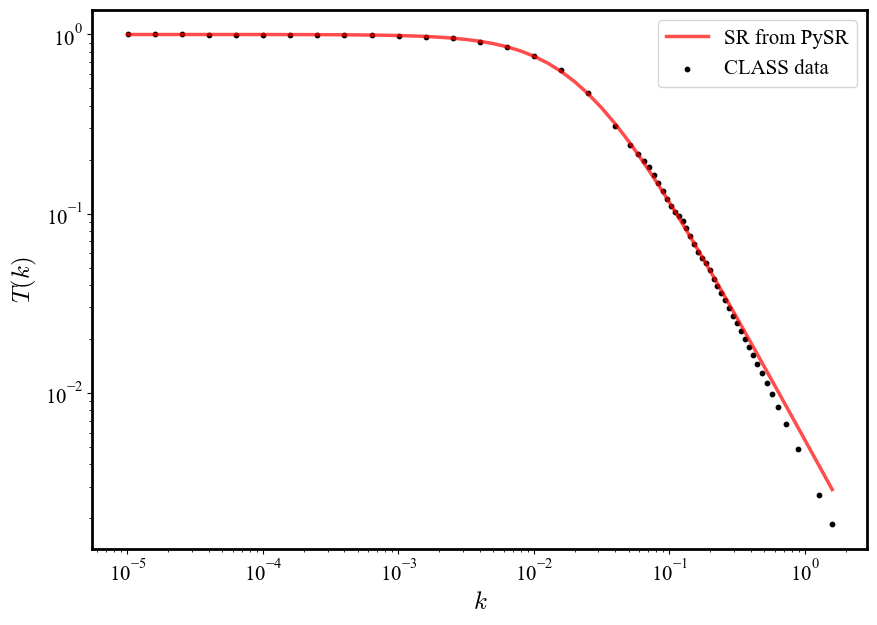

In [100]:
TFNvar(k,y,T,'model1-0709.pkl')
save_img('PresTF1')

Checking if model1-0709.pkl exists...
Loading model from model1-0709.pkl


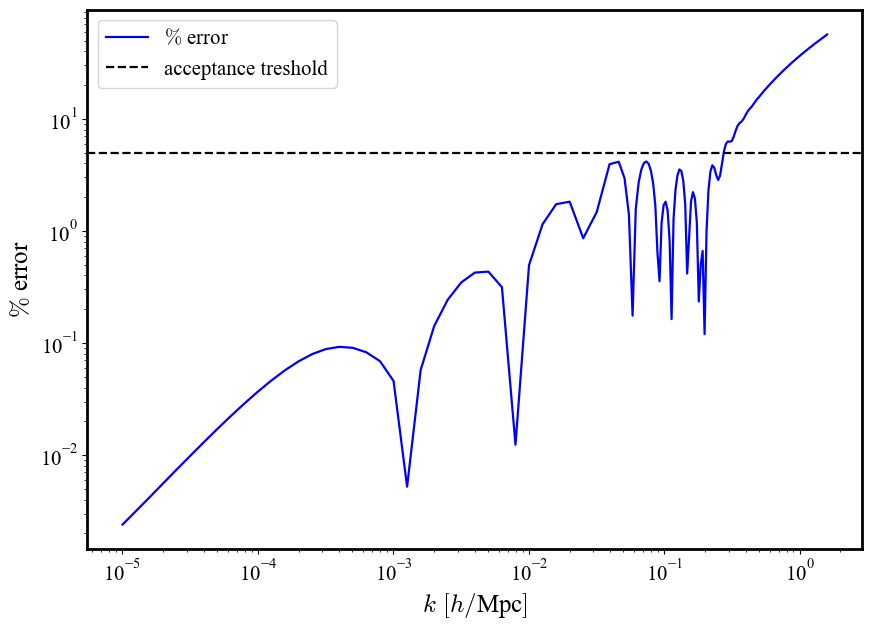

In [101]:
errNvar(k,y,T,'model1-0709.pkl')
save_img('ErrTF1')

searching now with
$$z:=\frac{k}{\omega_m}$$
$$ T(z) = \frac{0.495}{5.38 z^{1.38} + 0.495} $$

Checking if hall_of_fame_2023-10-04_091455.330.pkl exists...
Loading model from hall_of_fame_2023-10-04_091455.330.pkl
Model equation is:  \frac{0.495}{5.38 x_{0}^{1.38} + 0.495}
MAPE of the model is:  5.17 %
RMSE of the model is:  0.003502201821205902
Max percentage error is:  61.13 %


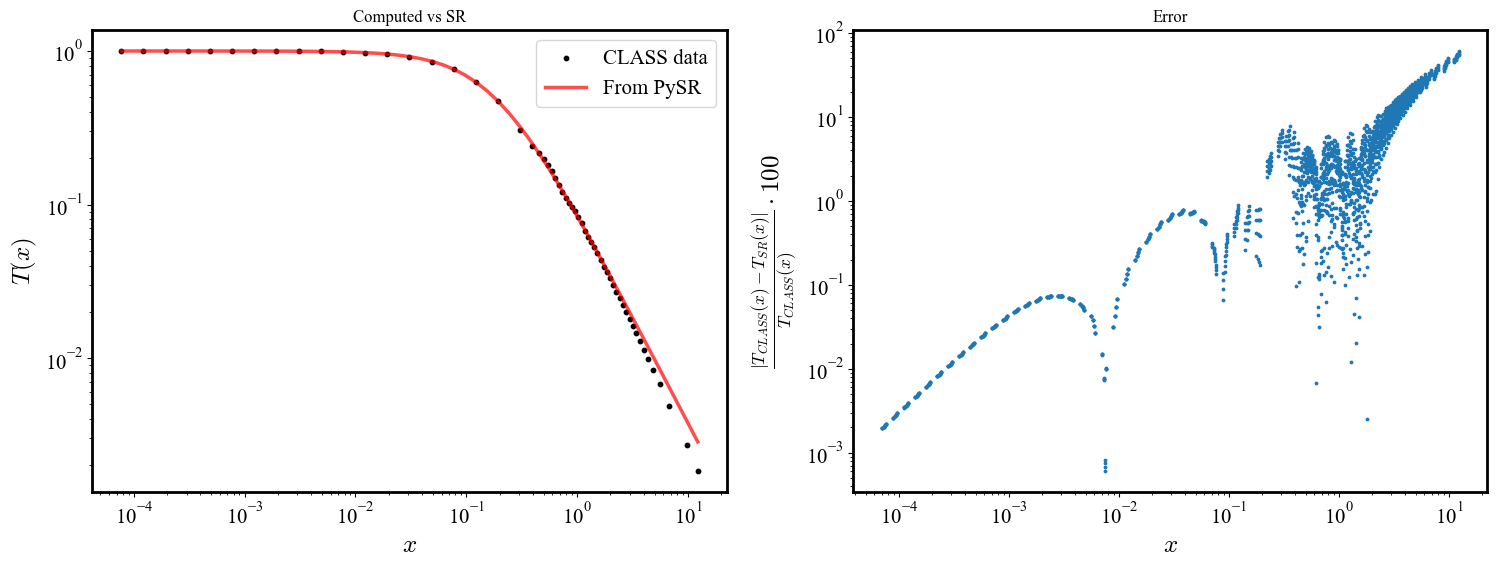

In [102]:
bran(z,T,'hall_of_fame_2023-10-04_091455.330.pkl') #'model2-0709.pkl

now using, inspired from BBKS:
$$ x:= \frac{k}{\omega_m-\omega_b}$$
$$ T(x)=\frac{1}{1+8.88x^{1.40}} $$

Checking if model3-3108.pkl exists...
Loading model from model3-3108.pkl
Model equation is:  - \frac{1.96}{- \frac{17.4 x^{0.0917}}{\left(\frac{1}{x}\right)^{1.31}} - 1.96}
MAPE of the model is:  3.84 %
RMSE of the model is:  0.0037413468481859117
Max percentage error is:  44.87 %


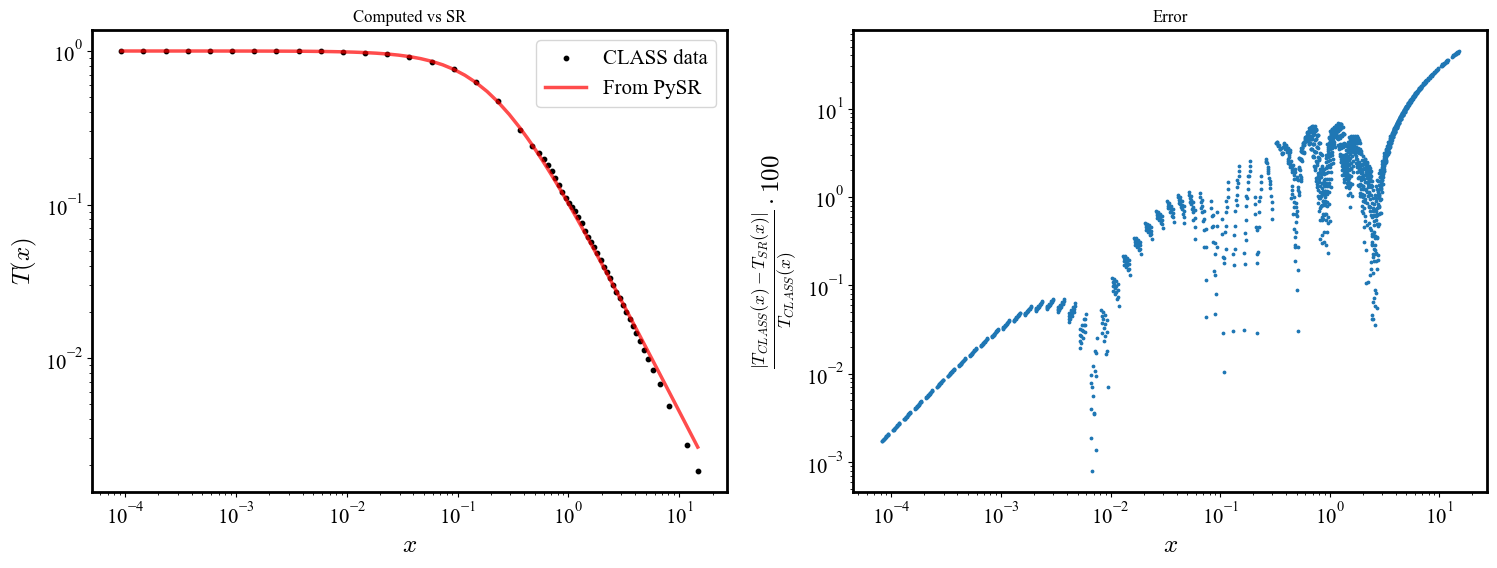

In [103]:
bran(x,T,'model3-3108.pkl')

Checking if model3-3108.pkl exists...
Loading model from model3-3108.pkl


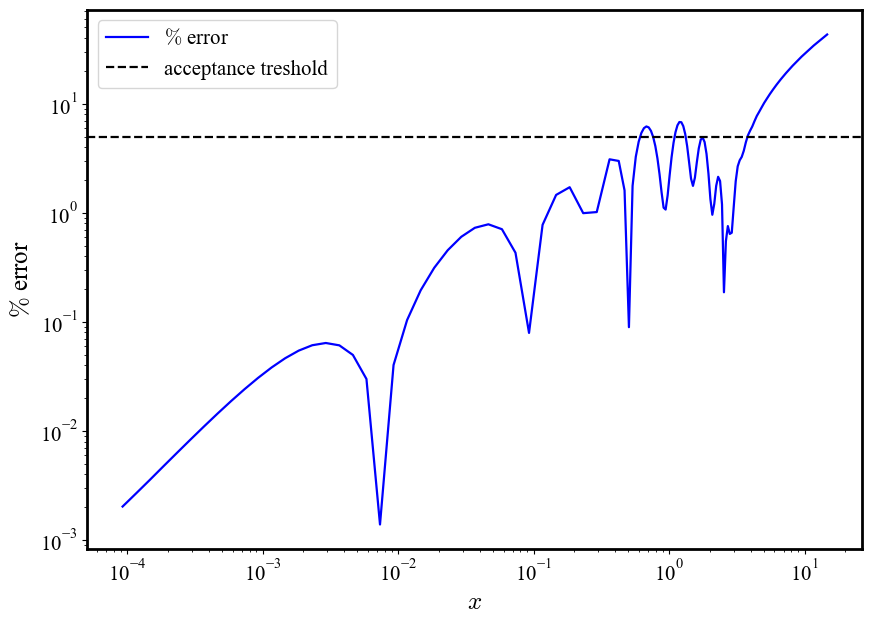

In [104]:
err1var(x,T,'model3-3108.pkl')
save_img('ErrTF2')

we have a problem with high $k$: we will use from now on the x variable bc is the best fit to data. We will try another ways to reduce errors.

----
# WITH ONE MASSIVE NEUTRINO
----

$$T(x) = \frac{0.642}{5.68 x^{1.37} + 0.642}$$

Checking if hall_of_fame_2023-10-02_102146.993.pkl exists...
Loading model from hall_of_fame_2023-10-02_102146.993.pkl
Model equation is:  - \frac{0.642}{- 5.68 x^{1.37} - 0.642}
MAPE of the model is:  5.64 %
RMSE of the model is:  0.0033888271507990647
Max percentage error is:  64.03 %


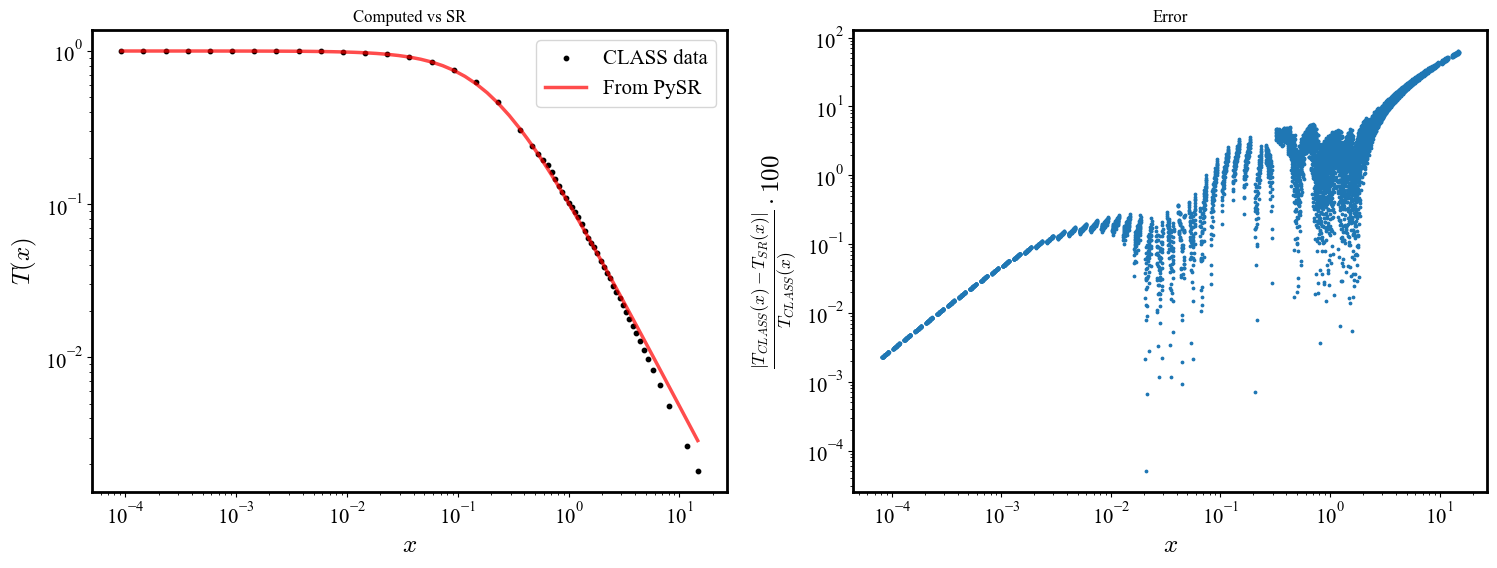

In [105]:
bran(x2,T2,'hall_of_fame_2023-10-02_102146.993.pkl')

----
# $\log T(k)$ 
----

## Without massive neutrinos

$$T(x) = \frac{1}{1.87 x^2 + 3.14x\log{\left(x \right)} + 6.60x + 1} $$

Checking if hall_of_fame_2023-10-02_102847.887.pkl exists...
Loading model from hall_of_fame_2023-10-02_102847.887.pkl
Model equation is:  \frac{\log{\left(\frac{0.318}{x \left(0.600 x + \frac{\log{\left(x \right)}}{\log{\left(10 \right)}} + 2.10\right) + 0.318} \right)}}{\log{\left(10 \right)}}
MAPE of the model is:  1.29 %
RMSE of the model is:  0.005152803278938697
Max percentage error is:  4.26 %


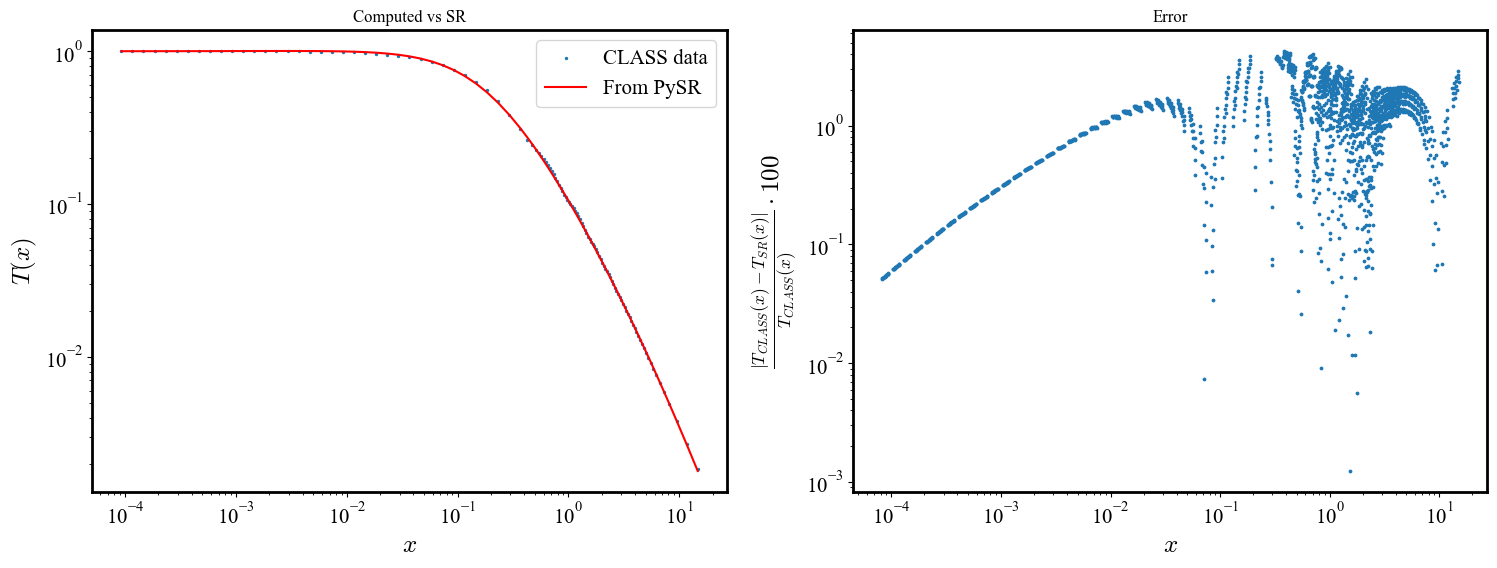

In [106]:
branlog(x,T,'hall_of_fame_2023-10-02_102847.887.pkl')

## With one massive neutrino

$$ \log T(k; \omega_m,\omega_b) = - \frac{2.07 k \left(0.824 k + 1\right)^{0.419}}{k + \omega_{m}} $$

Checking if hall_of_fame_2023-10-04_101342.077.pkl exists...
Loading model from hall_of_fame_2023-10-04_101342.077.pkl
Model equation is:  - \frac{2.07 k \left(0.824 k + 1\right)^{0.419}}{k + \omega_{m}}
MAPE of the model is:  3.2 %
RMSE of the model is:  0.014717893446649737
Max percentage error is:  17.64 %


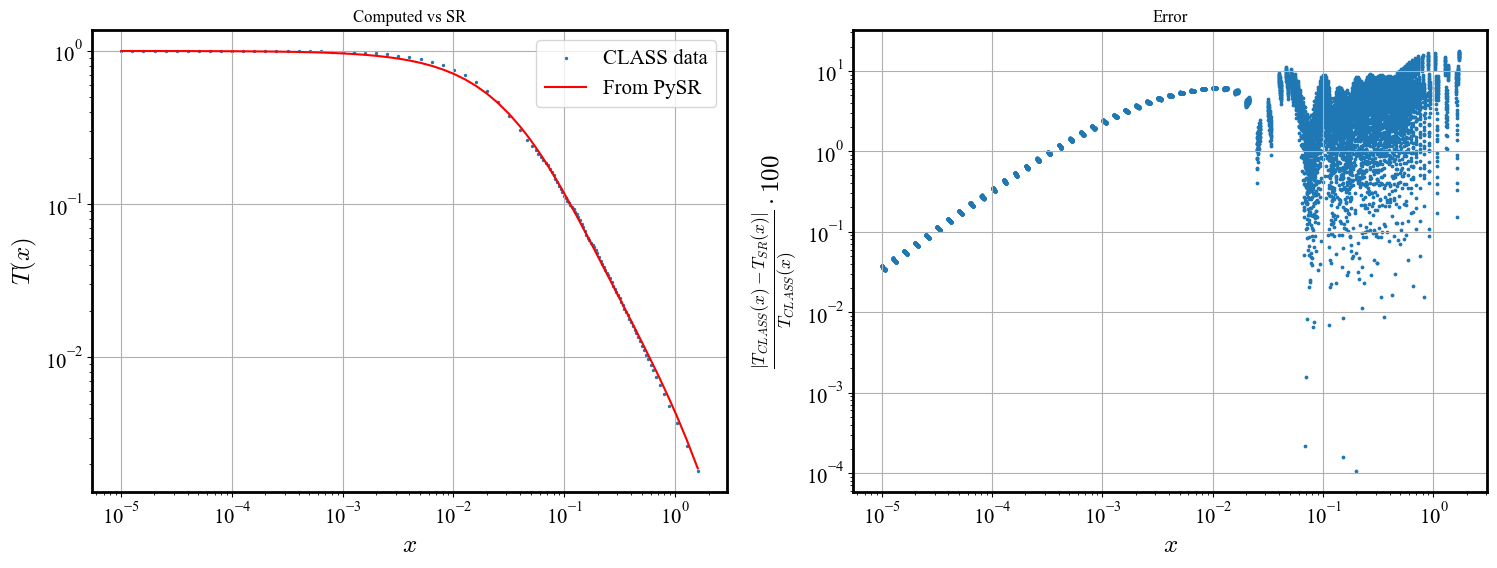

In [107]:
bran2log(k2,y2,T2,'hall_of_fame_2023-10-04_101342.077.pkl')

1)hall_of_fame_2023-10-02_103403.018.pkl
$$ \log T(x) = -1.02 \log{\left(0.117^{x} + 1.97 x \left(0.874 x + \frac{\log{\left(x \right)}}{\log{\left(10 \right)}} + 3.83\right) \right)} $$
2)hall_of_fame_2023-10-04_093033.137.pkl
$$ T(x) = \frac{0.340}{x \left(0.864 x^{0.914} + 0.903 \log{\left(x \right)} + 2.11\right) + 0.340}$$

Checking if hall_of_fame_2023-10-04_093033.137.pkl exists...
Loading model from hall_of_fame_2023-10-04_093033.137.pkl
Model equation is:  \frac{\log{\left(\frac{0.340}{x \left(0.864 x^{0.914} + \frac{0.903 \log{\left(x \right)}}{\log{\left(10 \right)}} + 2.11\right) + 0.340} \right)}}{\log{\left(10 \right)}}
MAPE of the model is:  2.31 %
RMSE of the model is:  0.005327091472122032
Max percentage error is:  6.05 %


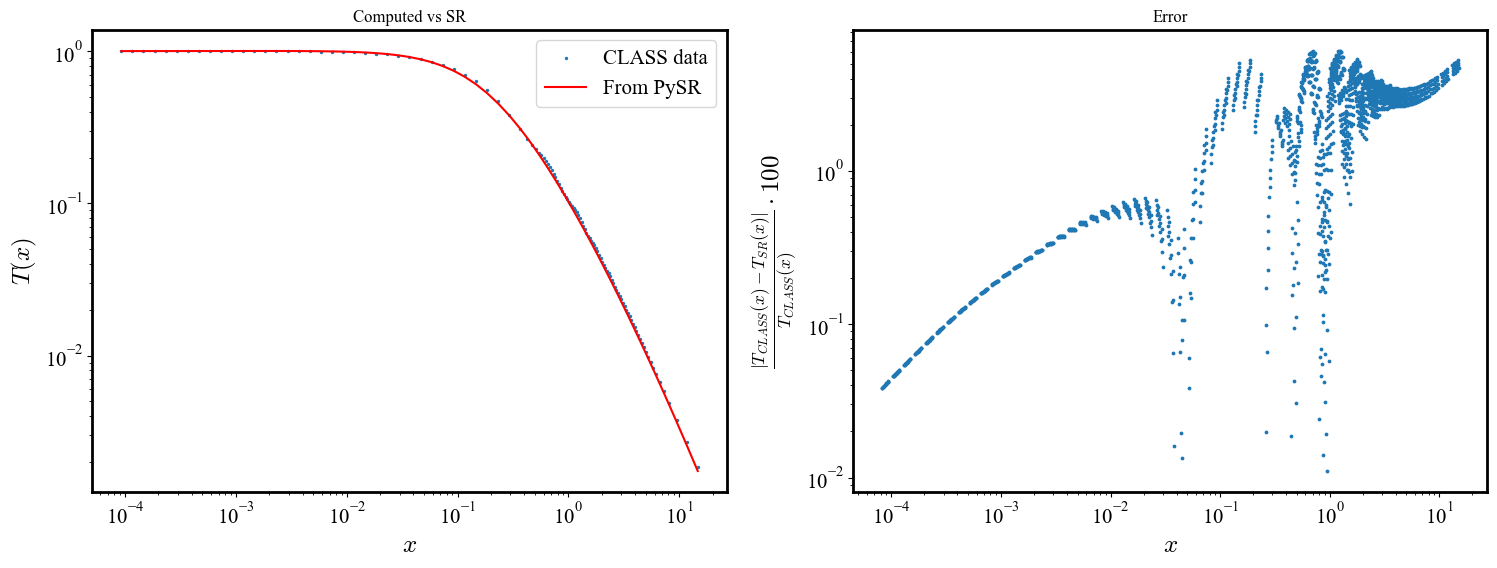

In [108]:
branlog(x,T,'hall_of_fame_2023-10-04_093033.137.pkl') 

It's fine but we don't like this dependence from logx. Let's modify loss function:

----
# Using $\chi^2$ as loss function
----

# Without massive neutrinos

$$T(x) = \frac{1}{4.24x^{1.08} + 4.24x^{1.74} + 1}$$

TRUE ONE

Checking if hall_of_fame_2023-10-08_162339.734.pkl exists...
Loading model from hall_of_fame_2023-10-08_162339.734.pkl
Model equation is:  \frac{0.236}{x^{1.08} + x^{1.74} + 0.233}
MAPE of the model is:  1.51 %
RMSE of the model is:  0.009235463012239155
Max percentage error is:  6.08 %


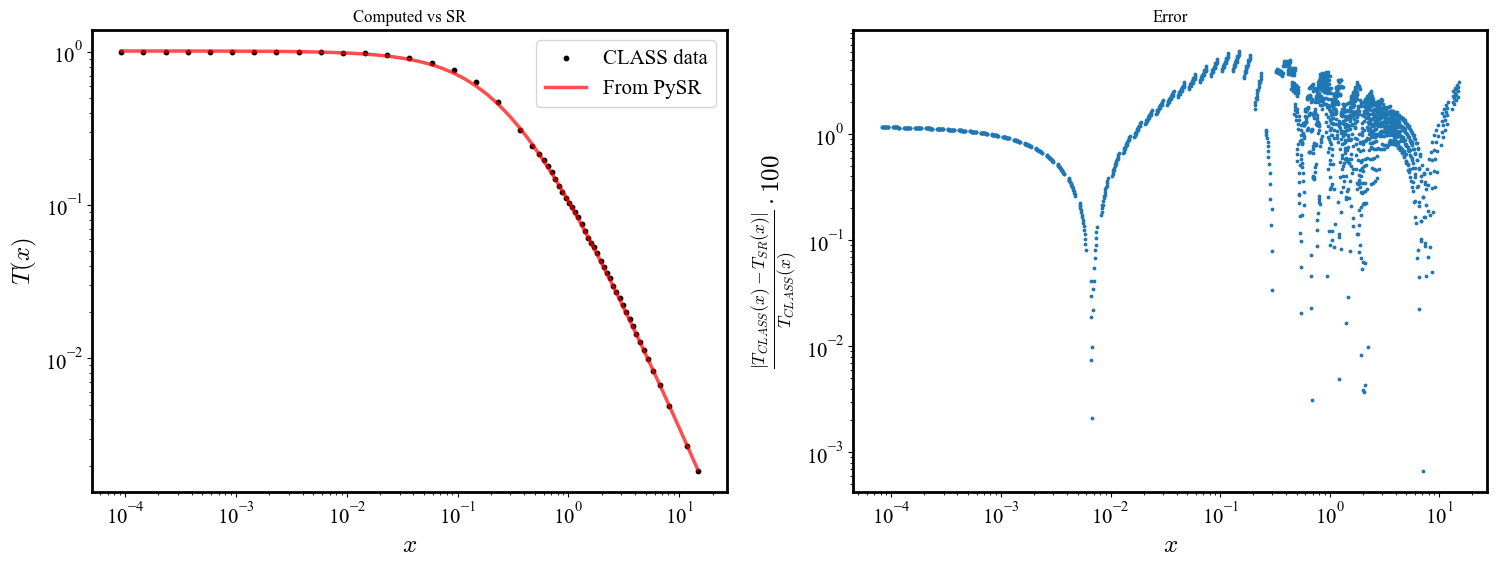

In [109]:
bran(x,T,'hall_of_fame_2023-10-08_162339.734.pkl')

$$ T(x) =  \frac{1}{5.35x^{1.674} + 2.88x+ 1}$$

Checking if hall_of_fame_2023-10-02_101206.854.pkl exists...
Loading model from hall_of_fame_2023-10-02_101206.854.pkl


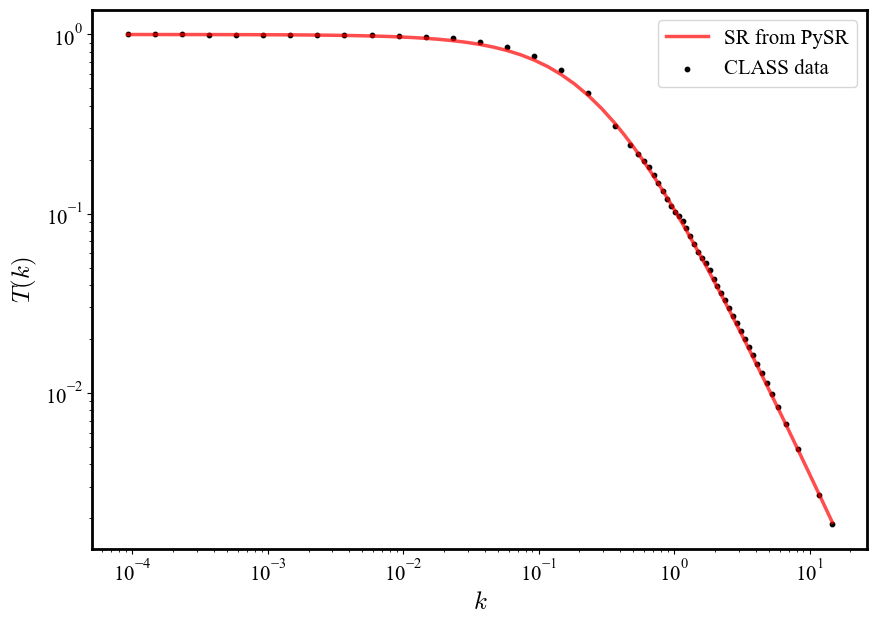

In [110]:
TF1var(x,T,'hall_of_fame_2023-10-02_101206.854.pkl')

Checking if hall_of_fame_2023-10-02_101206.854.pkl exists...
Loading model from hall_of_fame_2023-10-02_101206.854.pkl
Model equation is:  \frac{0.187}{x \left(x^{0.674} + 0.583\right) + 0.187}
MAPE of the model is:  1.92 %
RMSE of the model is:  0.011252145074087472
Max percentage error is:  6.19 %


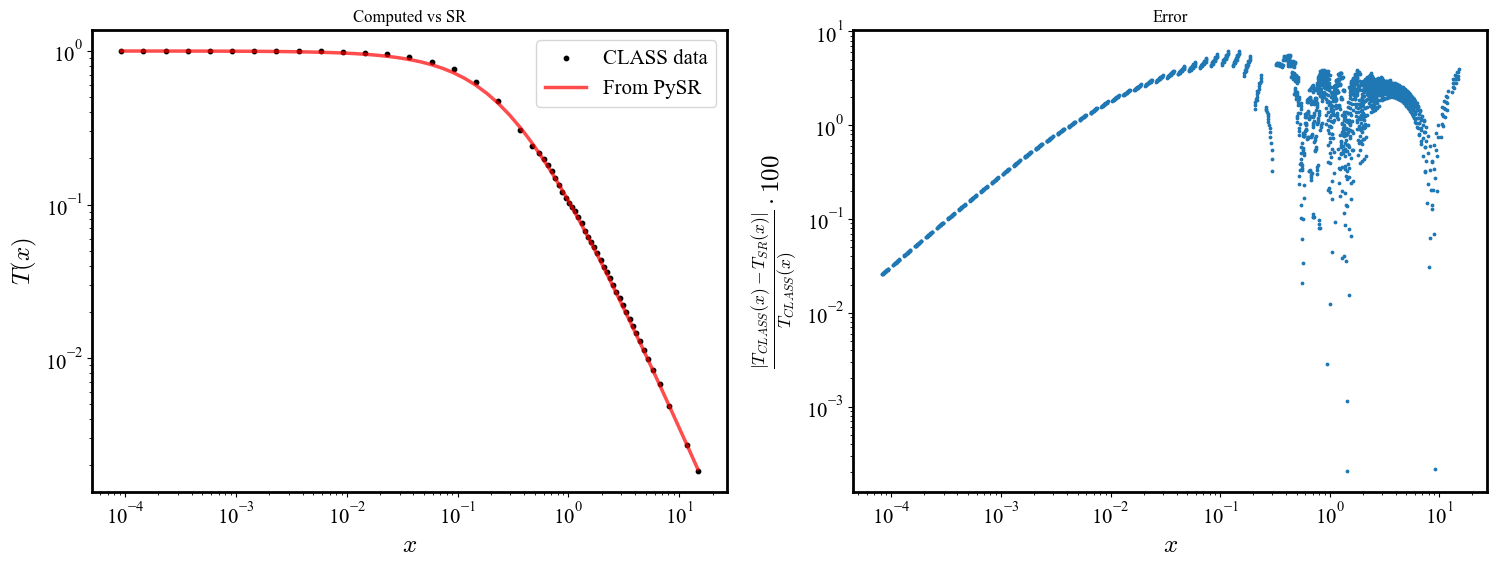

In [111]:
bran(x,T,'hall_of_fame_2023-10-02_101206.854.pkl')

# With one massive neutrino

$$T(x) = \frac{0.470}{x \left(3.32 x^{0.276} + 0.793 x\right) + 0.470}$$

Checking if hall_of_fame_2023-10-02_095118.325.pkl exists...
Loading model from hall_of_fame_2023-10-02_095118.325.pkl


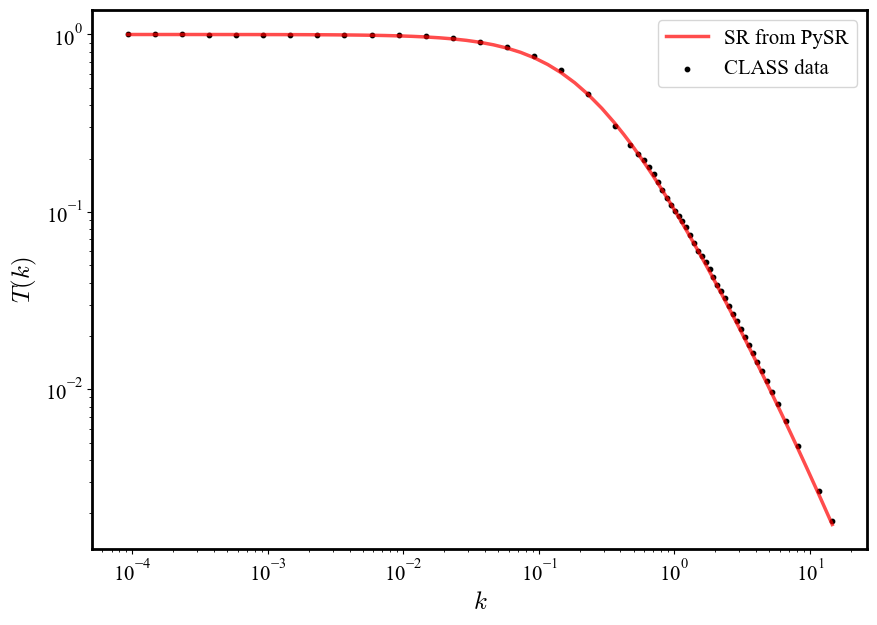

In [112]:
TF1var(x2,T2,'hall_of_fame_2023-10-02_095118.325.pkl')
save_img('TF1-MASSNU')

Checking if hall_of_fame_2023-10-02_095118.325.pkl exists...
Loading model from hall_of_fame_2023-10-02_095118.325.pkl
Model equation is:  \frac{0.470}{x \left(3.32 x^{0.276} + 0.793 x\right) + 0.470}
MAPE of the model is:  1.4 %
RMSE of the model is:  0.004699736928409353
Max percentage error is:  6.88 %


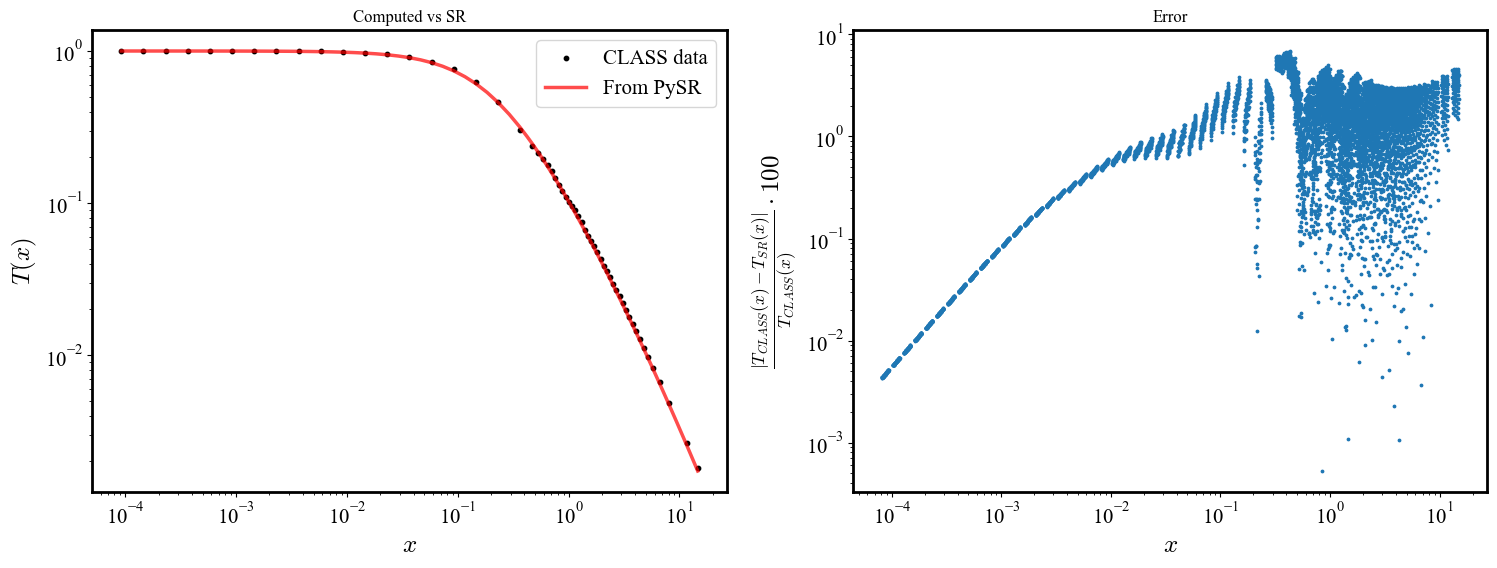

In [113]:
bran(x2,T2,'hall_of_fame_2023-10-02_095118.325.pkl')